# 

# 1. 09-09 - Wrangling - basic operations (Handout)

## Retrieval

-   What are some types of data?
-   What are some structures and databases used to handle data?

# 2. Why wrangling?

## 

-   Data doesn’t come neatly wrapped.
-   Wrangling decisions have big impacts on analysis and conclusions!

## The grammar of wrangling

-   Operations:
    -   select (rows and columns)
    -   add/drop columns and rows
    -   sort
    -   calculate summaries
    -   filter
    -   group/aggregate
    -   reshape
    -   join

------------------------------------------------------------------------

-   We’ll use `pandas`, but the ideas apply to other tools.
    -   R: tidyverse
    -   SQL: `SELECT`, `WHERE`, `GROUP BY`
    -   even Excel / Google Sheets

## `pandas`

“**pandas** is a fast, powerful, flexible and easy to use open source
data analysis and manipulation tool, built on top of the Python
programming language.” <https://pandas.pydata.org/>

You can import the library by doing:

In [1]:
import pandas as pd

-   The alias `pd` is a common convention for referencing Pandas.

## The Dataframe

Basically, “enhanced 2-dimensional tables with rich functionality”: -
**Multiple Data Types**: Supports various data types in a single
structure. - **Data Manipulation**: Built-in functions for sorting,
filtering, and grouping. - **Indexing**: Efficient access and retrieval
of data. - **Integration**: Easy integration with other Python tools and
libraries. - **Analysis**: Advanced operations, statistical functions,
and more.

# 3. Creating and loading dataframes

## 

You can create a DataFrame from various data sources, such as lists,
dictionaries, or external files.

Here’s an example using a dictionary:

In [2]:
# Example data
data = {
    'Occupation': ['Engineer', 'Doctor', 'Teacher', 'Artist', 'Nurse', 'Developer'],
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Female', 'Male'],
    'Age': [32, 45, 29, 41, 35, 28],
    'Level of Education': ['Bachelor', 'PhD', 'Master', 'High School', 'Bachelor', 'Master'],
    'Weight': [78, 65, 58, 80, 60, 75],
    'Height': [175, 160, 168, 180, 155, 170]
}

# Creating the DataFrame
df = pd.DataFrame(data)

print(df)

  Occupation  Gender  Age Level of Education  Weight  Height
0   Engineer    Male   32           Bachelor      78     175
1     Doctor  Female   45                PhD      65     160
2    Teacher  Female   29             Master      58     168
3     Artist    Male   41        High School      80     180
4      Nurse  Female   35           Bachelor      60     155
5  Developer    Male   28             Master      75     170

------------------------------------------------------------------------

-   `Occupation`: The person’s profession.
-   `Gender`: Male or Female.
-   `Age`: Person’s age in years.
-   `Level of Education`: Highest education level achieved.
-   `Weight`: Person’s weight in kilograms.
-   `Height`: Person’s height in centimeters.

------------------------------------------------------------------------

Explore the DataFrame using:

-   `df.head()`: Display the first 5 rows.
-   `df.info()`: Summary of the DataFrame, including data types.
-   `df.describe()`: Descriptive statistics for numerical columns.

## Loading from CSV Files

-   CSV (Comma-Separated Values) is a common format for storing tabular
    data.
-   Example: Department of Education [College
    Scorecard](https://collegescorecard.ed.gov/data/)
    -   Simplified dataset for this exercise:
        <https://calvin-data-science.github.io/data202/data/college_scorecard.csv>
-   Try to load this csv file using the function **pd.read_csv()**. Use
    the CSV file as argument!

## Loading from Excel Files

In [3]:
import pandas as pd

# Loading an Excel file into a DataFrame
df_excel = pd.read_excel('data.xlsx', sheet_name='Sheet1')

# Displaying the first few rows
print(df_excel.head())

## Loading from Other File Formats

Pandas can load data from various other formats, including:

-   **JSON**: JavaScript Object Notation.

``` python
  df_json = pd.read_json('data.json')
```

-   **SQL Databases**: Loading data directly from databases.

``` python
from sqlalchemy import create_engine
engine = create_engine('sqlite:///:memory:')
df_sql = pd.read_sql('SELECT * FROM table_name', con=engine)
```

-   **HTML Tables**: Extracting data from web pages.

``` python
df_html = pd.read_html('https://example.com')[0]
```

## Handling Data while Loading

-   While loading data, Pandas provides several options to handle:
    -   **Missing Values**: `na_values`, `fillna()`
    -   **Date Parsing**: `parse_dates`, `date_parser`
    -   **Data Types**: `dtype` parameter to specify column data types
    -   **Custom Delimiters**: `sep` for specifying delimiters in text
        files

## Example: missing values

``` python
df_custom = pd.read_csv('data.csv', na_values=['NA', '?'], parse_dates=['date_column'])
```

# 4. Selecting

## Selecting a row

`iloc` = locate by *integer* *index*

In [4]:
df.iloc[0]

Occupation            Engineer
Gender                    Male
Age                         32
Level of Education    Bachelor
Weight                      78
Height                     175
Name: 0, dtype: object

## Selecting a *column*

In [5]:
df["Occupation"]

0     Engineer
1       Doctor
2      Teacher
3       Artist
4        Nurse
5    Developer
Name: Occupation, dtype: object

# 5. Adding and removing

## Adding rows

Here’s a slide about adding and dropping rows in a Pandas DataFrame:

### Slide 15: Adding and Dropping Rows in Pandas

``` markdown
# Adding and Dropping Rows in Pandas

## Adding Rows

### 1. Using `append()` method

- **Appending a Single Row**

  ```python
  # Create a new row as a dictionary
  new_row = {'Name': 'Eve', 'Gender': 'Female', 'Age': 28, 'Occupation': 'Teacher', 'Education Level': 'Bachelor', 'Height': 165, 'Weight': 55}
  
  # Append the new row to the DataFrame
  df = df.append(new_row, ignore_index=True)
```

------------------------------------------------------------------------

-   **Appending Multiple Rows**

    ``` python
    # Create new rows as a list of dictionaries
    new_rows = [{'Name': 'Frank', 'Gender': 'Male', 'Age': 40, 'Occupation': 'Scientist', 'Education Level': 'PhD', 'Height': 175, 'Weight': 80},
                {'Name': 'Grace', 'Gender': 'Female', 'Age': 32, 'Occupation': 'Nurse', 'Education Level': 'Master', 'Height': 160, 'Weight': 60}]

    # Append the new rows to the DataFrame
    df = df.append(new_rows, ignore_index=True)
    ```

------------------------------------------------------------------------

### 2. Using `iloc[]` indexing to add at a specific position

``` python
# Insert a new row at index 2
df.iloc[2] = {'Name': 'Hank', 'Gender': 'Male', 'Age': 29, 'Occupation': 'Artist', 'Education Level': 'Bachelor', 'Height': 170, 'Weight': 70}

# Reorder the DataFrame to reflect the new row
df = df.sort_index().reset_index(drop=True)
```

## Removing Rows

### 1. using `drop()` Method

-   **Dropping Rows by Index**

    ``` python
    # Drop rows with specific index labels
    df = df.drop([2, 4], axis=0)  # Drops rows with index 2 and 4
    ```

------------------------------------------------------------------------

-   **Dropping Rows Based on Condition**

    ``` python
    # Drop rows where Age is greater than 35
    df = df[df['Age'] <= 35]
    ```

------------------------------------------------------------------------

### 2. Using `dropna()` Method

-   **Dropping Rows with Missing Values**

    ``` python
    # Drop rows where any value is NaN
    df = df.dropna()

    # Drop rows where specific columns have NaN
    df = df.dropna(subset=['Age', 'Occupation'])
    ```

## Adding Columns

### 1. **Using Direct Assignment**

-   **Adding a Single Column**

    ``` python
    # Add a new column with default values
    df['NewColumn'] = [10, 20, 30, 40, 50]  # List should match the length of the DataFrame

    # Add a new column based on existing columns
    df['BMI'] = df['Weight'] / (df['Height'] / 100) ** 2
    ```

------------------------------------------------------------------------

-   **Adding Multiple Columns**

    ``` python
    # Add multiple columns at once
    new_data = {'Country': ['USA', 'Canada', 'UK', 'Germany', 'France'],
                'Status': ['Active', 'Inactive', 'Active', 'Active', 'Inactive']}
    df = pd.concat([df, pd.DataFrame(new_data)], axis=1)
    ```

------------------------------------------------------------------------

### 2. Using `assign()` method

-   **Adding Columns with `assign()`**

    ``` python
    # Add a new column using assign
    df = df.assign(YearOfBirth=2024 - df['Age'])
    ```

## Removing Columns

### 1. Using `drop()` Method

-   **Dropping Single or Multiple Columns**

    ``` python
    # Drop a single column
    df = df.drop('NewColumn', axis=1)

    # Drop multiple columns
    df = df.drop(['BMI', 'Country'], axis=1)
    ```

------------------------------------------------------------------------

-   **Dropping Columns by Condition**

    ``` python
    # Drop columns with all missing values
    df = df.dropna(axis=1, how='all')

    # Drop columns with any missing values
    df = df.dropna(axis=1, how='any')
    ```

------------------------------------------------------------------------

### 2. **Using `del` Keyword**

``` python
# Remove a column using del
del df['Status']
```

# 6. Sorting

## 

-   Example: Sorting by a single column

In [6]:
# Sorting by a single column in ascending order
sorted_df = df.sort_values(by='Age')

# Sorting by a single column in descending order
sorted_df_desc = df.sort_values(by='Age', ascending=False)

sorted_df_desc.head()

## Sorting by Multiple Columns

In [7]:
# Sorting by multiple columns: 'Occupation' ascending, then 'Age' descending
sorted_multi = df.sort_values(by=['Occupation', 'Age'], ascending=[True, False])

sorted_multi.head()

# 7. Calculating summary statistics

## 

-   Pandas provides easy methods to calculate summary statistics for
    numerical data.

-   **`df.describe()`**: Generates summary statistics for all numerical
    columns:

    -   **Count**: Number of non-null entries.
    -   **Mean**: Average value.
    -   **Standard Deviation (std)**: Measures data spread.
    -   **Minimum (min) and Maximum (max)**: Smallest and largest
        values.
    -   **25%, 50%, 75% Percentiles**: Values below which 25%, 50%, and
        75% of the data fall.

In [8]:
df.describe()

## Additional Methods

-   **Mean**: `df['Age'].mean()` — Average age of persons.
-   **Median**: `df['Height'].median()` — Median height.
-   **Mode**: `df['Gender'].mode()` — Most frequent gender.
-   **Value Counts**: `df['Occupation'].value_counts()` — Count of each
    occupation.

Use these methods to quickly gain insights into your dataset!

# 8. The uses of tables

## 

> The table has the function of treating multiplicity itself,
> distributing it and deriving from it as many effects as possible
> (Michel Foucault 1997)

> “All things are vectors” (Alfred North Whitehead, 1960)

<figure>
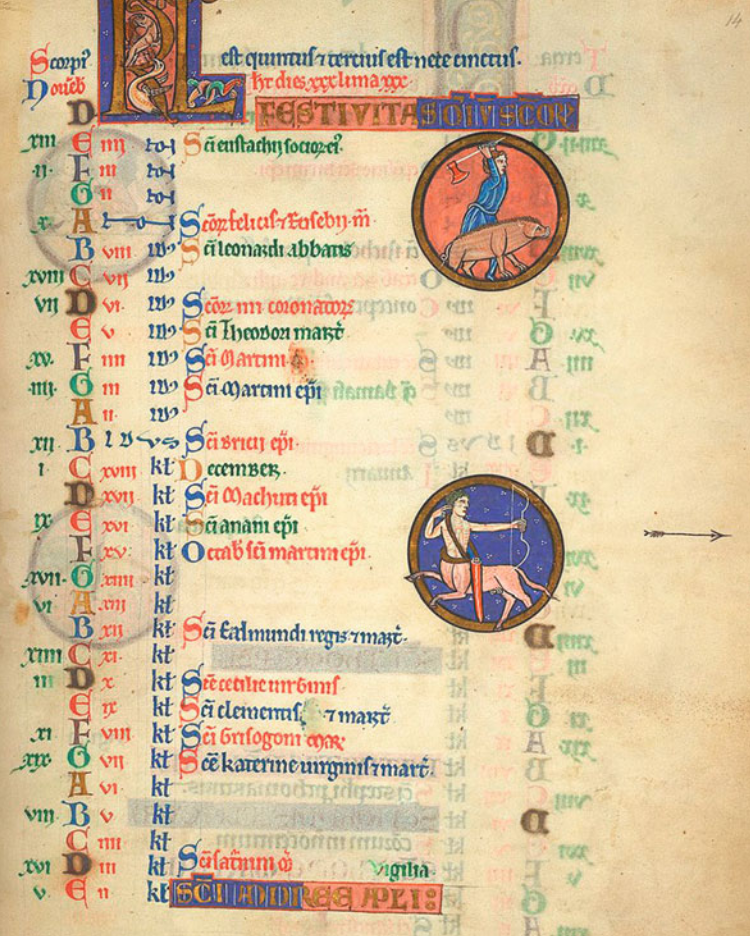
<figcaption aria-hidden="true">A Medieval Calendar, November, English
psalter (MS. Royal 1DX, f. 14, British Library).</figcaption>
</figure>

-   For details, see Marchese, Francis T. 2013. “Tables and Early
    Information Visualization.” In Knowledge Visu­alization Currents,
    edited by Francis T. Marchese and Ebad Banissi, 35-61. London:
    Springer

## Vectorization

-   How does that affect our knowledge? Is everything reducible to this
    “rule”?
    -   Simple limitations: narrative text, graph data, structured data,
        etc.
    -   What is the reasoning we use to consider one row in a list? How
        do we consider that the “columns” can correctly describe them?

------------------------------------------------------------------------

> “In presuming to reduce the world accurately to the terms definable
> within a dataset, system designers exercise a **power to decide which
> differences make a difference**. Often and without acknowledgment,
> these decisions “flatten complex social, cultural, political, and
> historical relations into quantifiable entities”.
> (https://churchlifejournal.nd.edu/articles/the-image-and-the-idol-a-theological-reflection-on-ai-bias/)

-   Is it sufficient, in our example, to represent an Occupation as
    “Housewife”?

## Categorization

> “You must distinguish between the holy and the common, between the
> unclean and the clean.” Leviticus 10.10 (NIV)

-   When we categorize, we attribute **order**.

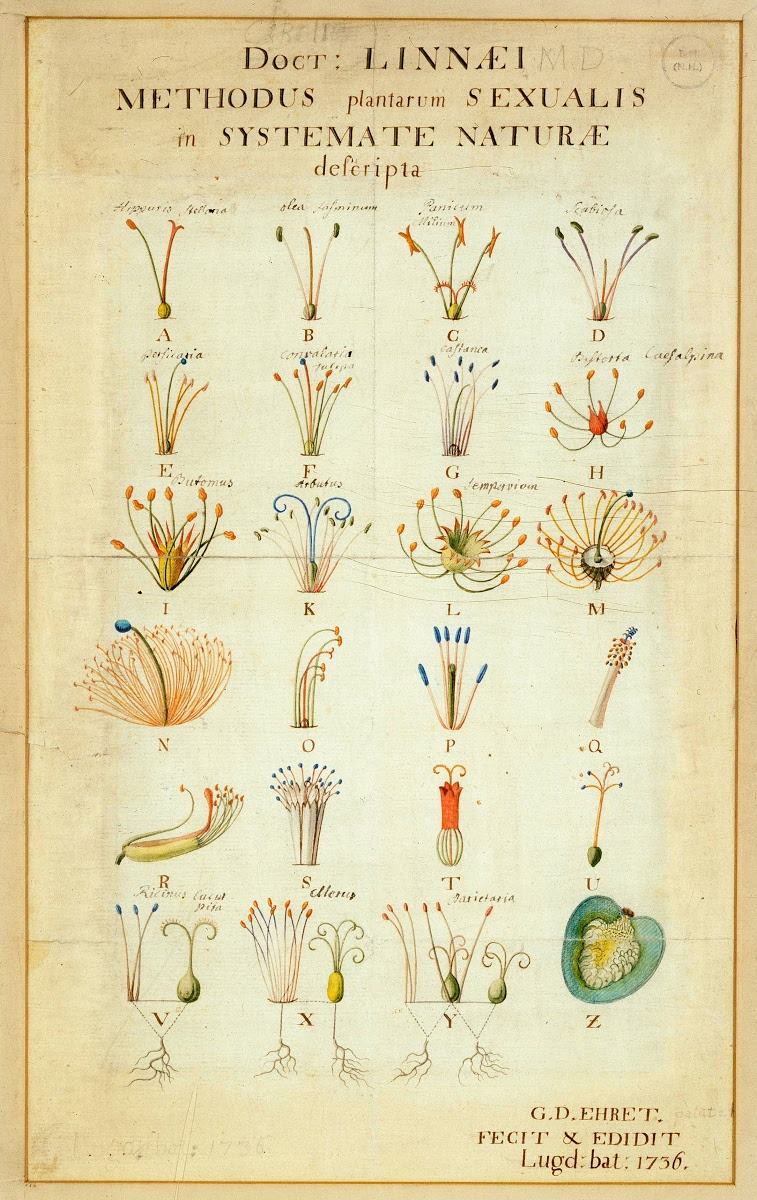

------------------------------------------------------------------------

-   However, in our categorization, something is always lost, and
    reality may be more complex than that.

> “In a proxy culture, we may easily be de-individualized and treated as
> a type (a type of customer, a type of driver, a type of citizen, a
> type of patient, a type of person who lives at that postal code, who
> drives that type of car, who goes to that type of restaurant, etc.).
> Such proxies may be further used to reidentify us as specific
> consumers for customizing purposes” (Luciano Floridi 2014, p. 58).

------------------------------------------------------------------------

> “You hypocrites! Isaiah was right when he prophesied about you:
> “‘These people honor me with their lips, but their hearts are far from
> me. They worship me in vain; their teachings are merely human rules.’”
> (Matthew 15:18-20)

-   We need **wisdom** to know when our “table”-ifications,
    vectorizations and categorizations will help us to see, and when
    they actually hinder our vision.